In [1]:
from scipy.stats import binom
from plotnine import *
from pandas import DataFrame
from numpy import arange

Binom model

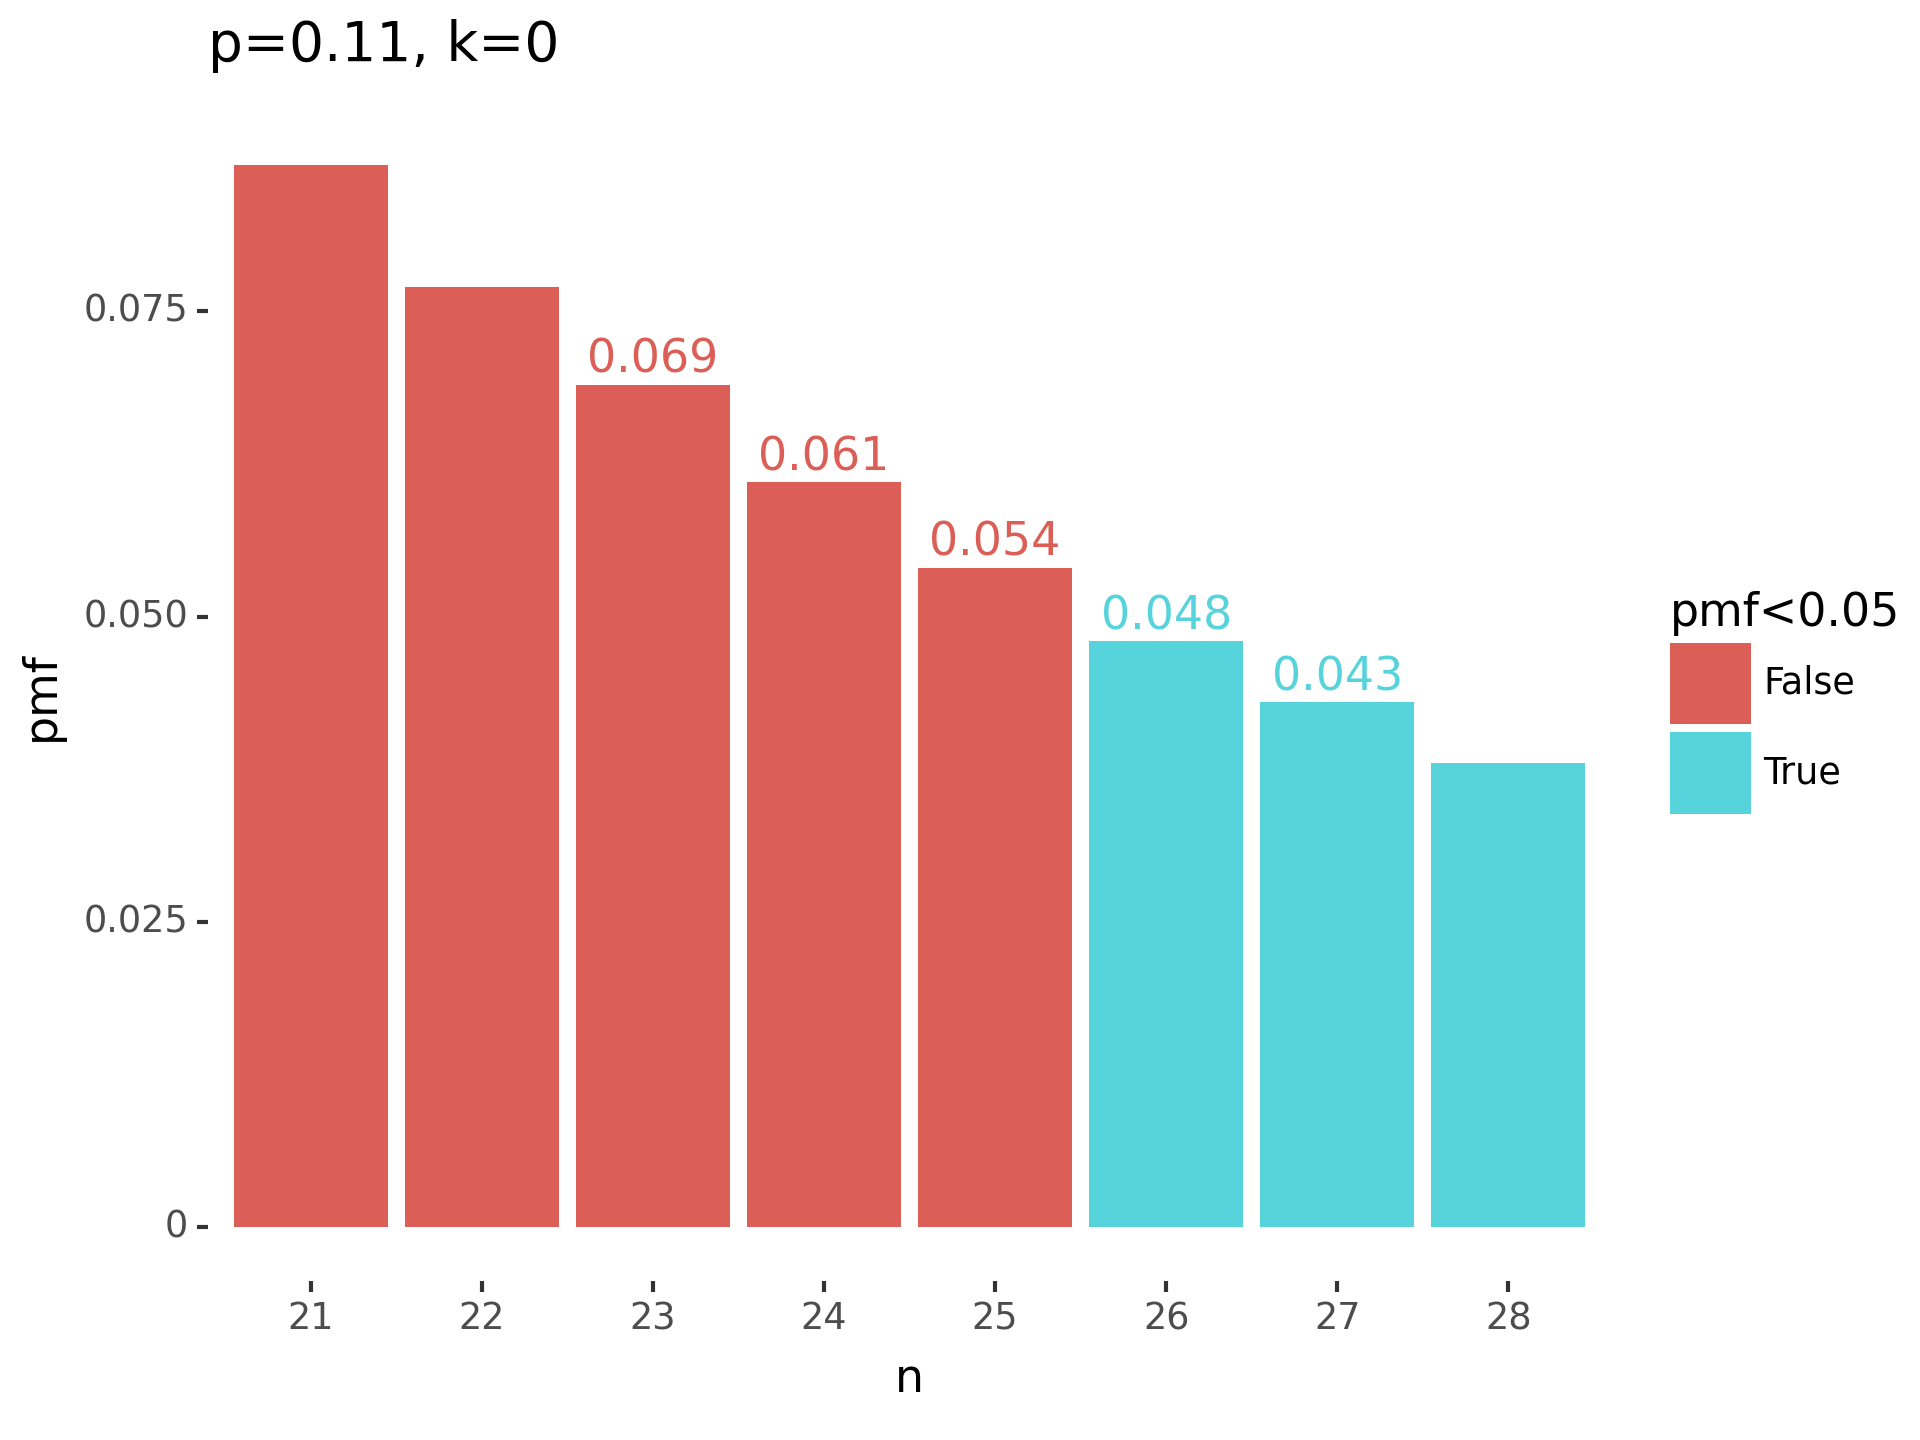

<Figure Size: (960 x 720)>

In [56]:
n = arange(21,29)
p = 0.11
k = 0
df2 = DataFrame({'n':n,'pmf':binom.pmf(p=p, k=k, n=n).round(3)}).astype({'n':'category'})
# ggplot only accept dataframe
# n as category type is to show correct x-ticks in following ggplot 

(
    ggplot(df2, aes(x='n', y='pmf'))
    + geom_col(aes(fill='pmf<0.05'))
    + geom_text(df2.query("0.04<pmf<=0.07"), aes(label='pmf', color="pmf<0.05"), nudge_y = 0.002)
    # Only text some pmf data
	+ theme_tufte()
    + theme(dpi=150)
    + labs(title=f"p={p}, k={k}")
)

Validation

In [9]:
from reliability.Reliability_testing import sample_size_no_failures
sample_size_no_failures(reliability=1-p)

Results from sample_size_no_failures:
To achieve the desired reliability of 0.89 with a 95% lower confidence bound, the required sample size to test is 26 items.

This result is based on a specified weibull shape parameter of 1 and an equivalent test duration of 1 lifetime.
If there are any failures during this test, then the desired lower confidence bound will not be achieved.
If this occurs, use the function Reliability_testing.one_sample_proportion to determine the lower and upper bounds on reliability.


26